In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
import warnings
warnings.filterwarnings('ignore')

## Overlap of target genes

In [2]:
# Read ZFP143 target genes in mouse
mouse_zfp143_targets = pd.read_csv('../chipseq/annotations/ZFP143_peaks_GENCODE_genes_associations.txt', sep = '\t')
mouse_zfp143_targets = list(mouse_zfp143_targets['gene_id'].values)
mouse_zfp143_targets = [x.split('.')[0] for x in mouse_zfp143_targets]
print('Number of ZFP143 targets in mouse:', len(mouse_zfp143_targets))

# Read conserved ZFP143 target genes in mouse
conserved_mouse_zfp143_targets = pd.read_csv('./conserved_genes/conserved_ZFP143_peaks_GENCODE_genes_associations.txt', sep = '\t')
conserved_mouse_zfp143_targets = list(conserved_mouse_zfp143_targets['gene_id'].values)
conserved_mouse_zfp143_targets = [x.split('.')[0] for x in conserved_mouse_zfp143_targets]
print('\nNumber of conserved ZFP143 targets in mouse:', len(conserved_mouse_zfp143_targets))

# Read conserved ZNF143 target genes in human and convert them to mouse orthologs
conserved_human_znf143_targets = pd.read_csv('./conserved_genes/conserved_ZNF143_peaks_GENCODE_genes_associations.txt', sep = '\t')
conserved_human_znf143_targets = list(conserved_human_znf143_targets['gene_id'].values)
conserved_human_znf143_targets = [x.split('.')[0] for x in conserved_human_znf143_targets]
print('\nNumber of conserved ZNF143 targets in human:', len(conserved_human_znf143_targets))

human_mouse_orthologs = pd.read_csv('./conserved_genes/human_to_mouse_orthologues_Ensembl_v110.txt', sep = '\t')
conserved_human_znf143_targets_mouse_orthologs = human_mouse_orthologs[human_mouse_orthologs['Gene stable ID'].isin(conserved_human_znf143_targets)]
conserved_human_znf143_targets_mouse_orthologs = list(conserved_human_znf143_targets_mouse_orthologs['Mouse gene stable ID'].values)
conserved_human_znf143_targets_mouse_orthologs = np.unique(conserved_human_znf143_targets_mouse_orthologs)
print('Number of conserved ZNF143 targets in human, orthologues in mouse:', len(conserved_human_znf143_targets_mouse_orthologs))

Number of ZFP143 targets in mouse: 2226

Number of conserved ZFP143 targets in mouse: 1504

Number of conserved ZNF143 targets in human: 1696
Number of conserved ZNF143 targets in human, orthologues in mouse: 1443


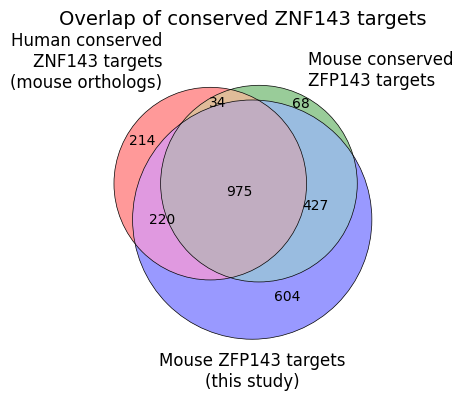

In [3]:
plt.figure(figsize = (4.5, 4.5))
plt.title('Overlap of conserved ZNF143 targets', fontsize = 14, y = 1.1)
v = venn3([set(conserved_human_znf143_targets_mouse_orthologs), set(conserved_mouse_zfp143_targets), set(mouse_zfp143_targets)], 
          ('Human conserved\nZNF143 targets\n(mouse orthologs)', 'Mouse conserved\nZFP143 targets', 'Mouse ZFP143 targets\n(this study)'))
c = venn3_circles([set(conserved_human_znf143_targets_mouse_orthologs), set(conserved_mouse_zfp143_targets), set(mouse_zfp143_targets)], lw = 0.5)

plt.tight_layout()
plt.show()

## Overlap of GO enrichment terms of conserved target genes

In [4]:
go_enrichment_human = pd.read_csv('./conserved_genes/gProfiler_hsapiens_Ensembl_v110_intersections.csv')
go_enrichment_human = go_enrichment_human[go_enrichment_human['source'] != 'REAC']
go_enrichment_human['fraction'] = go_enrichment_human['intersection_size'] / go_enrichment_human['term_size']
go_enrichment_human.head()

,source,term_name,term_id,highlighted,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections,fraction
0,GO:MF,nucleic acid binding,GO:0003676,True,1.738648e-20,19.759788,3313,1393,417,17181,"ENSG00000188976,ENSG00000242485,ENSG0000017527...",0.125868
1,GO:MF,RNA binding,GO:0003723,False,3.298897e-20,19.481631,1500,1393,231,17181,"ENSG00000188976,ENSG00000242485,ENSG0000005337...",0.154000
2,GO:MF,heterocyclic compound binding,GO:1901363,False,5.243343e-18,17.280392,4030,1393,473,17181,"ENSG00000188976,ENSG00000242485,ENSG0000017527...",0.117370
3,GO:MF,organic cyclic compound binding,GO:0097159,False,7.889619e-17,16.102944,4099,1393,474,17181,"ENSG00000188976,ENSG00000242485,ENSG0000017527...",0.115638
4,GO:MF,structural constituent of ribosome,GO:0003735,True,3.350096e-12,11.474943,148,1393,44,17181,"ENSG00000242485,ENSG00000142676,ENSG0000011622...",0.297297


In [5]:
go_enrichment_mouse = pd.read_csv('./conserved_genes/gProfiler_mmusculus_Ensembl_v110_intersections.csv')
go_enrichment_mouse = go_enrichment_mouse[go_enrichment_mouse['source'] != 'REAC']
go_enrichment_mouse['fraction'] = go_enrichment_mouse['intersection_size'] / go_enrichment_mouse['term_size']
go_enrichment_mouse.head()

,source,term_name,term_id,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections,fraction
0,GO:MF,RNA binding,GO:0003723,8.440137e-25,24.073651,909,1243,141,21671,"ENSMUSG00000043716,ENSMUSG00000037447,ENSMUSG0...",0.155116
1,GO:MF,nucleic acid binding,GO:0003676,1.749143e-24,23.757175,2657,1243,285,21671,"ENSMUSG00000043716,ENSMUSG00000037447,ENSMUSG0...",0.107264
2,GO:MF,heterocyclic compound binding,GO:1901363,3.488713e-20,19.457335,3476,1243,331,21671,"ENSMUSG00000043716,ENSMUSG00000037447,ENSMUSG0...",0.095224
3,GO:MF,organic cyclic compound binding,GO:0097159,6.091552e-19,18.215272,3556,1243,332,21671,"ENSMUSG00000043716,ENSMUSG00000037447,ENSMUSG0...",0.093363
4,GO:MF,binding,GO:0005488,1.430276e-18,17.844580,11555,1243,821,21671,"ENSMUSG00000025907,ENSMUSG00000043716,ENSMUSG0...",0.071051


In [6]:
go_enrichment_our = pd.read_csv('../chipseq/annotations/gProfiler_mmusculus_04-10-2023_16-33-35__intersections.csv')
go_enrichment_our = go_enrichment_our[go_enrichment_our['source'] != 'REAC']
go_enrichment_our['fraction'] = go_enrichment_our['intersection_size'] / go_enrichment_our['term_size']
go_enrichment_our.head()

,source,term_name,term_id,highlighted,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections,fraction
0,GO:MF,nucleic acid binding,GO:0003676,True,6.849951e-40,39.164313,2657,1860,431,21671,"ENSMUSG00000043716,ENSMUSG00000041859,ENSMUSG0...",0.162213
1,GO:MF,binding,GO:0005488,False,1.269874e-33,32.896239,11555,1860,1248,21671,"ENSMUSG00000025907,ENSMUSG00000043716,ENSMUSG0...",0.108005
2,GO:MF,heterocyclic compound binding,GO:1901363,False,3.823687e-33,32.417518,3476,1860,500,21671,"ENSMUSG00000043716,ENSMUSG00000041859,ENSMUSG0...",0.143843
3,GO:MF,organic cyclic compound binding,GO:0097159,False,3.015522e-31,30.520637,3556,1860,502,21671,"ENSMUSG00000043716,ENSMUSG00000041859,ENSMUSG0...",0.141170
4,GO:MF,RNA binding,GO:0003723,False,1.554022e-22,21.808543,909,1860,175,21671,"ENSMUSG00000043716,ENSMUSG00000037447,ENSMUSG0...",0.192519


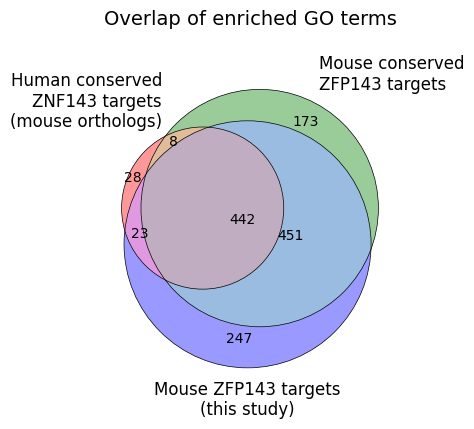

In [7]:
plt.figure(figsize = (4.5, 4.5))
plt.title('Overlap of enriched GO terms', fontsize = 14, y = 1.1)
v = venn3([set(go_enrichment_human['term_id'].values), set(go_enrichment_mouse['term_id'].values), set(go_enrichment_our['term_id'].values)], 
          ('Human conserved\nZNF143 targets\n(mouse orthologs)', 'Mouse conserved\nZFP143 targets', 'Mouse ZFP143 targets\n(this study)'))
c = venn3_circles([set(go_enrichment_human['term_id'].values), set(go_enrichment_mouse['term_id'].values), set(go_enrichment_our['term_id'].values)], lw = 0.5)

plt.tight_layout()
plt.show()

### Merge and analyze overlapping GO terms

In [8]:
go_enrichment = go_enrichment_mouse.merge(go_enrichment_human, on = ['source', 'term_name', 'term_id'], suffixes = ('_mouse', '_human'))
go_enrichment.head()

,source,term_name,term_id,adjusted_p_value_mouse,negative_log10_of_adjusted_p_value_mouse,term_size_mouse,query_size_mouse,intersection_size_mouse,effective_domain_size_mouse,intersections_mouse,fraction_mouse,highlighted,adjusted_p_value_human,negative_log10_of_adjusted_p_value_human,term_size_human,query_size_human,intersection_size_human,effective_domain_size_human,intersections_human,fraction_human
0,GO:MF,RNA binding,GO:0003723,8.440137e-25,24.073651,909,1243,141,21671,"ENSMUSG00000043716,ENSMUSG00000037447,ENSMUSG0...",0.155116,False,3.298897e-20,19.481631,1500,1393,231,17181,"ENSG00000188976,ENSG00000242485,ENSG0000005337...",0.154000
1,GO:MF,nucleic acid binding,GO:0003676,1.749143e-24,23.757175,2657,1243,285,21671,"ENSMUSG00000043716,ENSMUSG00000037447,ENSMUSG0...",0.107264,True,1.738648e-20,19.759788,3313,1393,417,17181,"ENSG00000188976,ENSG00000242485,ENSG0000017527...",0.125868
2,GO:MF,heterocyclic compound binding,GO:1901363,3.488713e-20,19.457335,3476,1243,331,21671,"ENSMUSG00000043716,ENSMUSG00000037447,ENSMUSG0...",0.095224,False,5.243343e-18,17.280392,4030,1393,473,17181,"ENSG00000188976,ENSG00000242485,ENSG0000017527...",0.117370
3,GO:MF,organic cyclic compound binding,GO:0097159,6.091552e-19,18.215272,3556,1243,332,21671,"ENSMUSG00000043716,ENSMUSG00000037447,ENSMUSG0...",0.093363,False,7.889619e-17,16.102944,4099,1393,474,17181,"ENSG00000188976,ENSG00000242485,ENSG0000017527...",0.115638
4,GO:MF,binding,GO:0005488,1.430276e-18,17.844580,11555,1243,821,21671,"ENSMUSG00000025907,ENSMUSG00000043716,ENSMUSG0...",0.071051,False,2.808153e-07,6.551579,15191,1393,1296,17181,"ENSG00000188976,ENSG00000187961,ENSG0000017575...",0.085314


In [9]:
go_enrichment[go_enrichment['term_name'].isin([x for x in go_enrichment['term_name'].values if 'intr' in x])]

,source,term_name,term_id,adjusted_p_value_mouse,negative_log10_of_adjusted_p_value_mouse,term_size_mouse,query_size_mouse,intersection_size_mouse,effective_domain_size_mouse,intersections_mouse,fraction_mouse,highlighted,adjusted_p_value_human,negative_log10_of_adjusted_p_value_human,term_size_human,query_size_human,intersection_size_human,effective_domain_size_human,intersections_human,fraction_human
74,GO:BP,intracellular transport,GO:0046907,8.150029e-20,19.088841,1431,1246,172,22193,"ENSMUSG00000070939,ENSMUSG00000026028,ENSMUSG0...",0.120196,False,9.225983e-12,11.034987,1389,1300,192,15992,"ENSG00000142655,ENSG00000116688,ENSG0000015936...",0.138229
103,GO:BP,intracellular protein transport,GO:0006886,3.215535e-12,11.492747,753,1246,96,22193,"ENSMUSG00000026028,ENSMUSG00000026027,ENSMUSG0...",0.127490,True,2.975087e-08,7.526500,709,1300,107,15992,"ENSG00000142655,ENSG00000116688,ENSG0000015936...",0.150917
296,GO:BP,cytoskeleton-dependent intracellular transport,GO:0030705,8.649964e-03,2.062986,194,1246,23,22193,"ENSMUSG00000026028,ENSMUSG00000034292,ENSMUSG0...",0.118557,False,3.996174e-02,1.398356,184,1300,27,15992,"ENSG00000142655,ENSG00000143553,ENSG0000016346...",0.146739
313,GO:CC,intracellular anatomical structure,GO:0005622,2.999334e-120,119.522975,12726,1248,1101,21708,"ENSMUSG00000025907,ENSMUSG00000043716,ENSMUSG0...",0.086516,True,1.357322e-52,51.867317,13424,1320,1253,16673,"ENSG00000188976,ENSG00000187961,ENSG0000017575...",0.093340
314,GO:CC,intracellular organelle,GO:0043229,5.932129e-109,108.226789,11197,1248,1014,21708,"ENSMUSG00000025907,ENSMUSG00000043716,ENSMUSG0...",0.090560,False,1.955689e-49,48.708700,11660,1320,1149,16673,"ENSG00000188976,ENSG00000187961,ENSG0000017575...",0.098542
317,GO:CC,intracellular membrane-bounded organelle,GO:0043231,9.451887e-89,88.024481,10242,1248,930,21708,"ENSMUSG00000025907,ENSMUSG00000025921,ENSMUSG0...",0.090803,False,1.463181e-36,35.834702,10616,1320,1050,16673,"ENSG00000188976,ENSG00000175756,ENSG0000022197...",0.098907
319,GO:CC,intracellular organelle lumen,GO:0070013,1.956809e-62,61.708451,4378,1248,505,21708,"ENSMUSG00000079658,ENSMUSG00000037447,ENSMUSG0...",0.115349,False,4.017823e-34,33.396009,5460,1320,643,16673,"ENSG00000188976,ENSG00000175756,ENSG0000022197...",0.117766
326,GO:CC,intracellular non-membrane-bounded organelle,GO:0043232,1.317579e-48,47.880223,3994,1248,445,21708,"ENSMUSG00000043716,ENSMUSG00000025921,ENSMUSG0...",0.111417,False,7.617204e-14,13.118204,4439,1320,477,16673,"ENSG00000188976,ENSG00000187961,ENSG0000017575...",0.107457
331,GO:CC,intracellular protein-containing complex,GO:0140535,2.501555e-26,25.601790,864,1248,137,21708,"ENSMUSG00000079658,ENSMUSG00000010290,ENSMUSG0...",0.158565,False,2.803138e-19,18.552355,876,1320,152,16673,"ENSG00000162413,ENSG00000142784,ENSG0000013076...",0.173516


In [10]:
gsoi = ['mitotic cell cycle', 'cell cycle',
        'cytoplasmic translation', 'mitochondrial translation', 'cytosolic ribosome', 'mitochondrial ribosome',
        'oxidative phosphorylation', 'respirasome', 'ATP biosynthetic process',
        'mitochondrial membrane organization', 'mitochondrial gene expression', 
        'intracellular transport', 'cellular response to stress', 'cytoplasmic stress granule', 'protein folding']

go_subset = go_enrichment[go_enrichment['term_name'].isin(gsoi)]
go_subset = go_subset.sort_values(['fraction_mouse'])
go_subset = go_subset[['source', 'term_name', 
                       'adjusted_p_value_mouse', 'negative_log10_of_adjusted_p_value_mouse', 'term_size_mouse', 'intersection_size_mouse', 'fraction_mouse', 
                       'adjusted_p_value_human', 'negative_log10_of_adjusted_p_value_human', 'term_size_human', 'intersection_size_human', 'fraction_human']]
go_subset.sort_values(by = 'term_name', key=lambda column: column.map(lambda e: gsoi.index(e)), inplace = True)
go_subset

,source,term_name,adjusted_p_value_mouse,negative_log10_of_adjusted_p_value_mouse,term_size_mouse,intersection_size_mouse,fraction_mouse,adjusted_p_value_human,negative_log10_of_adjusted_p_value_human,term_size_human,intersection_size_human,fraction_human
104,GO:BP,mitotic cell cycle,5.914057e-12,11.228115,820,101,0.123171,7.487574e-06,5.125659,802,108,0.134663
76,GO:BP,cell cycle,1.266183e-17,16.897504,1527,174,0.113949,1.749820e-08,7.757007,1426,183,0.128331
86,GO:BP,cytoplasmic translation,2.218982e-15,14.653846,138,39,0.282609,1.042308e-08,7.982004,152,39,0.256579
125,GO:BP,mitochondrial translation,8.020669e-11,10.095789,124,31,0.250000,1.372105e-08,7.862613,128,35,0.273438
347,GO:CC,cytosolic ribosome,4.035028e-12,11.394153,113,31,0.274336,4.271537e-09,8.369416,108,31,0.287037
364,GO:CC,mitochondrial ribosome,1.816982e-07,6.740649,85,21,0.247059,5.670335e-08,7.246391,88,26,0.295455
243,GO:BP,oxidative phosphorylation,4.126389e-04,3.384430,134,21,0.156716,7.168880e-03,2.144549,128,23,0.179688
425,GO:CC,respirasome,2.533750e-03,2.596236,85,14,0.164706,1.058932e-02,1.975132,94,17,0.180851
254,GO:BP,ATP biosynthetic process,6.346805e-04,3.197445,98,17,0.173469,4.100775e-02,1.387134,89,16,0.179775
308,GO:BP,mitochondrial membrane organization,3.332467e-02,1.477234,109,14,0.128440,9.609339e-03,2.017306,99,19,0.191919


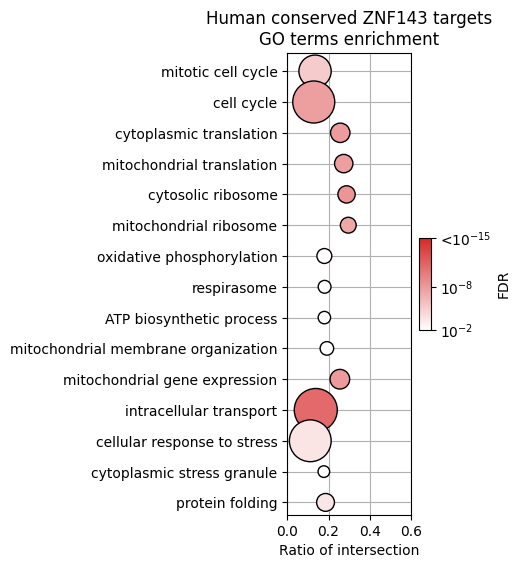

In [11]:
fraction = go_subset['fraction_human'].values
number = go_subset['intersection_size_human'].values
fdr = go_subset['negative_log10_of_adjusted_p_value_human'].values

go_plot = pd.DataFrame({'Fraction': fraction, 'Position': -np.arange(len(fraction)), 'Colors': fdr, 'Size': number*5})

plt.figure(figsize = (2, 6))
plt.title('Human conserved ZNF143 targets\nGO terms enrichment', fontsize = 12)
plt.grid(zorder = 0)
plt.scatter('Fraction', 'Position', s = 'Size', c = 'Colors', data = go_plot, zorder = 3, edgecolor = 'k',
            cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", "C3"]), vmin = 2, vmax = 15)
plt.xticks([0, 0.2, 0.4, 0.6])
plt.xlim((0, 0.6))
plt.ylim((-len(fraction)+0.6, 0.6))
plt.xlabel('Ratio of intersection', fontsize = 10)
plt.yticks((-1)*np.arange(len(go_subset)), go_subset['term_name'], fontsize = 10)
cbar = plt.colorbar(shrink = 0.2, ticks = [2, 8, 15], aspect = 8, label = 'FDR')
cbar.ax.set_yticklabels([r'$10^{-2}$', r'$10^{-8}$', r'<$10^{-15}$'])

plt.scatter([-5], [0.2], s = 200, c = 'k')
plt.show()

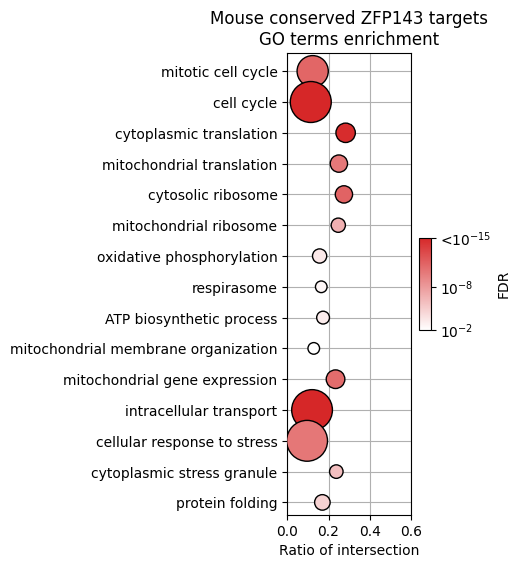

In [12]:
fraction = go_subset['fraction_mouse'].values
number = go_subset['intersection_size_mouse'].values
fdr = go_subset['negative_log10_of_adjusted_p_value_mouse'].values

go_plot = pd.DataFrame({'Fraction': fraction, 'Position': -np.arange(len(fraction)), 'Colors': fdr, 'Size': number*5})

plt.figure(figsize = (2, 6))
plt.title('Mouse conserved ZFP143 targets\nGO terms enrichment', fontsize = 12)
plt.grid(zorder = 0)
plt.scatter('Fraction', 'Position', s = 'Size', c = 'Colors', data = go_plot, zorder = 3, edgecolor = 'k',
            cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", "C3"]), vmin = 2, vmax = 15)
plt.xticks([0, 0.2, 0.4, 0.6])
plt.xlim((0, 0.6))
plt.ylim((-len(fraction)+0.6, 0.6))
plt.xlabel('Ratio of intersection', fontsize = 10)
plt.yticks((-1)*np.arange(len(go_subset)), go_subset['term_name'], fontsize = 10)
cbar = plt.colorbar(shrink = 0.2, ticks = [2, 8, 15], aspect = 8, label = 'FDR')
cbar.ax.set_yticklabels([r'$10^{-2}$', r'$10^{-8}$', r'<$10^{-15}$'])

plt.scatter([-5], [0.2], s = 200, c = 'k')
plt.show()